In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import os
os.getcwd()
pd.set_option('display.max_rows',500)

In [3]:
dataset=pd.read_csv('indian_liver_patient.csv')
dataset.head().transpose()

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [4]:
list(dataset.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
dataset['Age'].value_counts(normalize=True)*100

60    5.831904
45    4.288165
50    3.945111
42    3.602058
38    3.602058
32    3.430532
48    3.430532
55    3.087479
65    2.915952
40    2.915952
46    2.744425
33    2.572899
58    2.401372
75    2.401372
26    2.401372
35    2.058319
66    2.058319
18    1.886792
49    1.886792
36    1.886792
51    1.715266
30    1.715266
62    1.543739
70    1.543739
22    1.543739
37    1.543739
34    1.372213
28    1.372213
72    1.372213
31    1.372213
54    1.372213
52    1.200686
57    1.200686
21    1.200686
29    1.200686
53    1.029160
39    1.029160
27    1.029160
64    1.029160
47    1.029160
41    0.857633
61    0.857633
24    0.857633
25    0.857633
17    0.857633
56    0.686106
43    0.686106
13    0.686106
68    0.686106
74    0.686106
16    0.514580
44    0.514580
23    0.514580
20    0.514580
63    0.343053
14    0.343053
73    0.343053
69    0.343053
12    0.343053
4     0.343053
7     0.343053
19    0.343053
6     0.171527
8     0.171527
84    0.171527
85    0.171527
15    0.17

In [8]:
dataset['Age'].value_counts()

60    34
45    25
50    23
42    21
38    21
32    20
48    20
55    18
65    17
40    17
46    16
33    15
58    14
75    14
26    14
35    12
66    12
18    11
49    11
36    11
51    10
30    10
62     9
70     9
22     9
37     9
34     8
28     8
72     8
31     8
54     8
52     7
57     7
21     7
29     7
53     6
39     6
27     6
64     6
47     6
41     5
61     5
24     5
25     5
17     5
56     4
43     4
13     4
68     4
74     4
16     3
44     3
23     3
20     3
63     2
14     2
73     2
69     2
12     2
4      2
7      2
19     2
6      1
8      1
84     1
85     1
15     1
78     1
11     1
67     1
10     1
90     1
Name: Age, dtype: int64

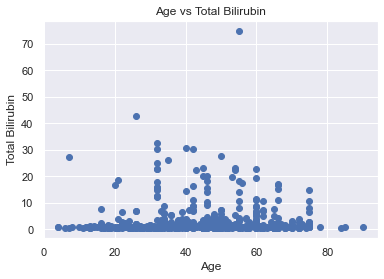

In [9]:
#  total bilirubin Range are 1.2 milligrams per deciliter (mg/dL)
plt.scatter(dataset.Age,dataset.Total_Bilirubin)
plt.title("Age vs Total Bilirubin")
plt.xlabel("Age")
plt.ylabel("Total Bilirubin")
plt.show()

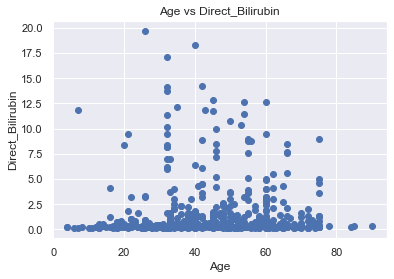

In [10]:
# Normal range of direct bilirubin for adults is 0.3
plt.scatter(dataset.Age,dataset.Direct_Bilirubin)
plt.title("Age vs Direct_Bilirubin")
plt.xlabel("Age")
plt.ylabel("Direct_Bilirubin")
plt.show()

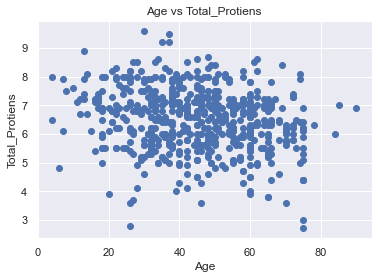

In [11]:
# the normal range of total Protein is 6 - 8.3  (g/dL) for adults
plt.scatter(dataset.Age,dataset.Total_Protiens)
plt.title("Age vs Total_Protiens")
plt.xlabel("Age")
plt.ylabel("Total_Protiens")
plt.show()

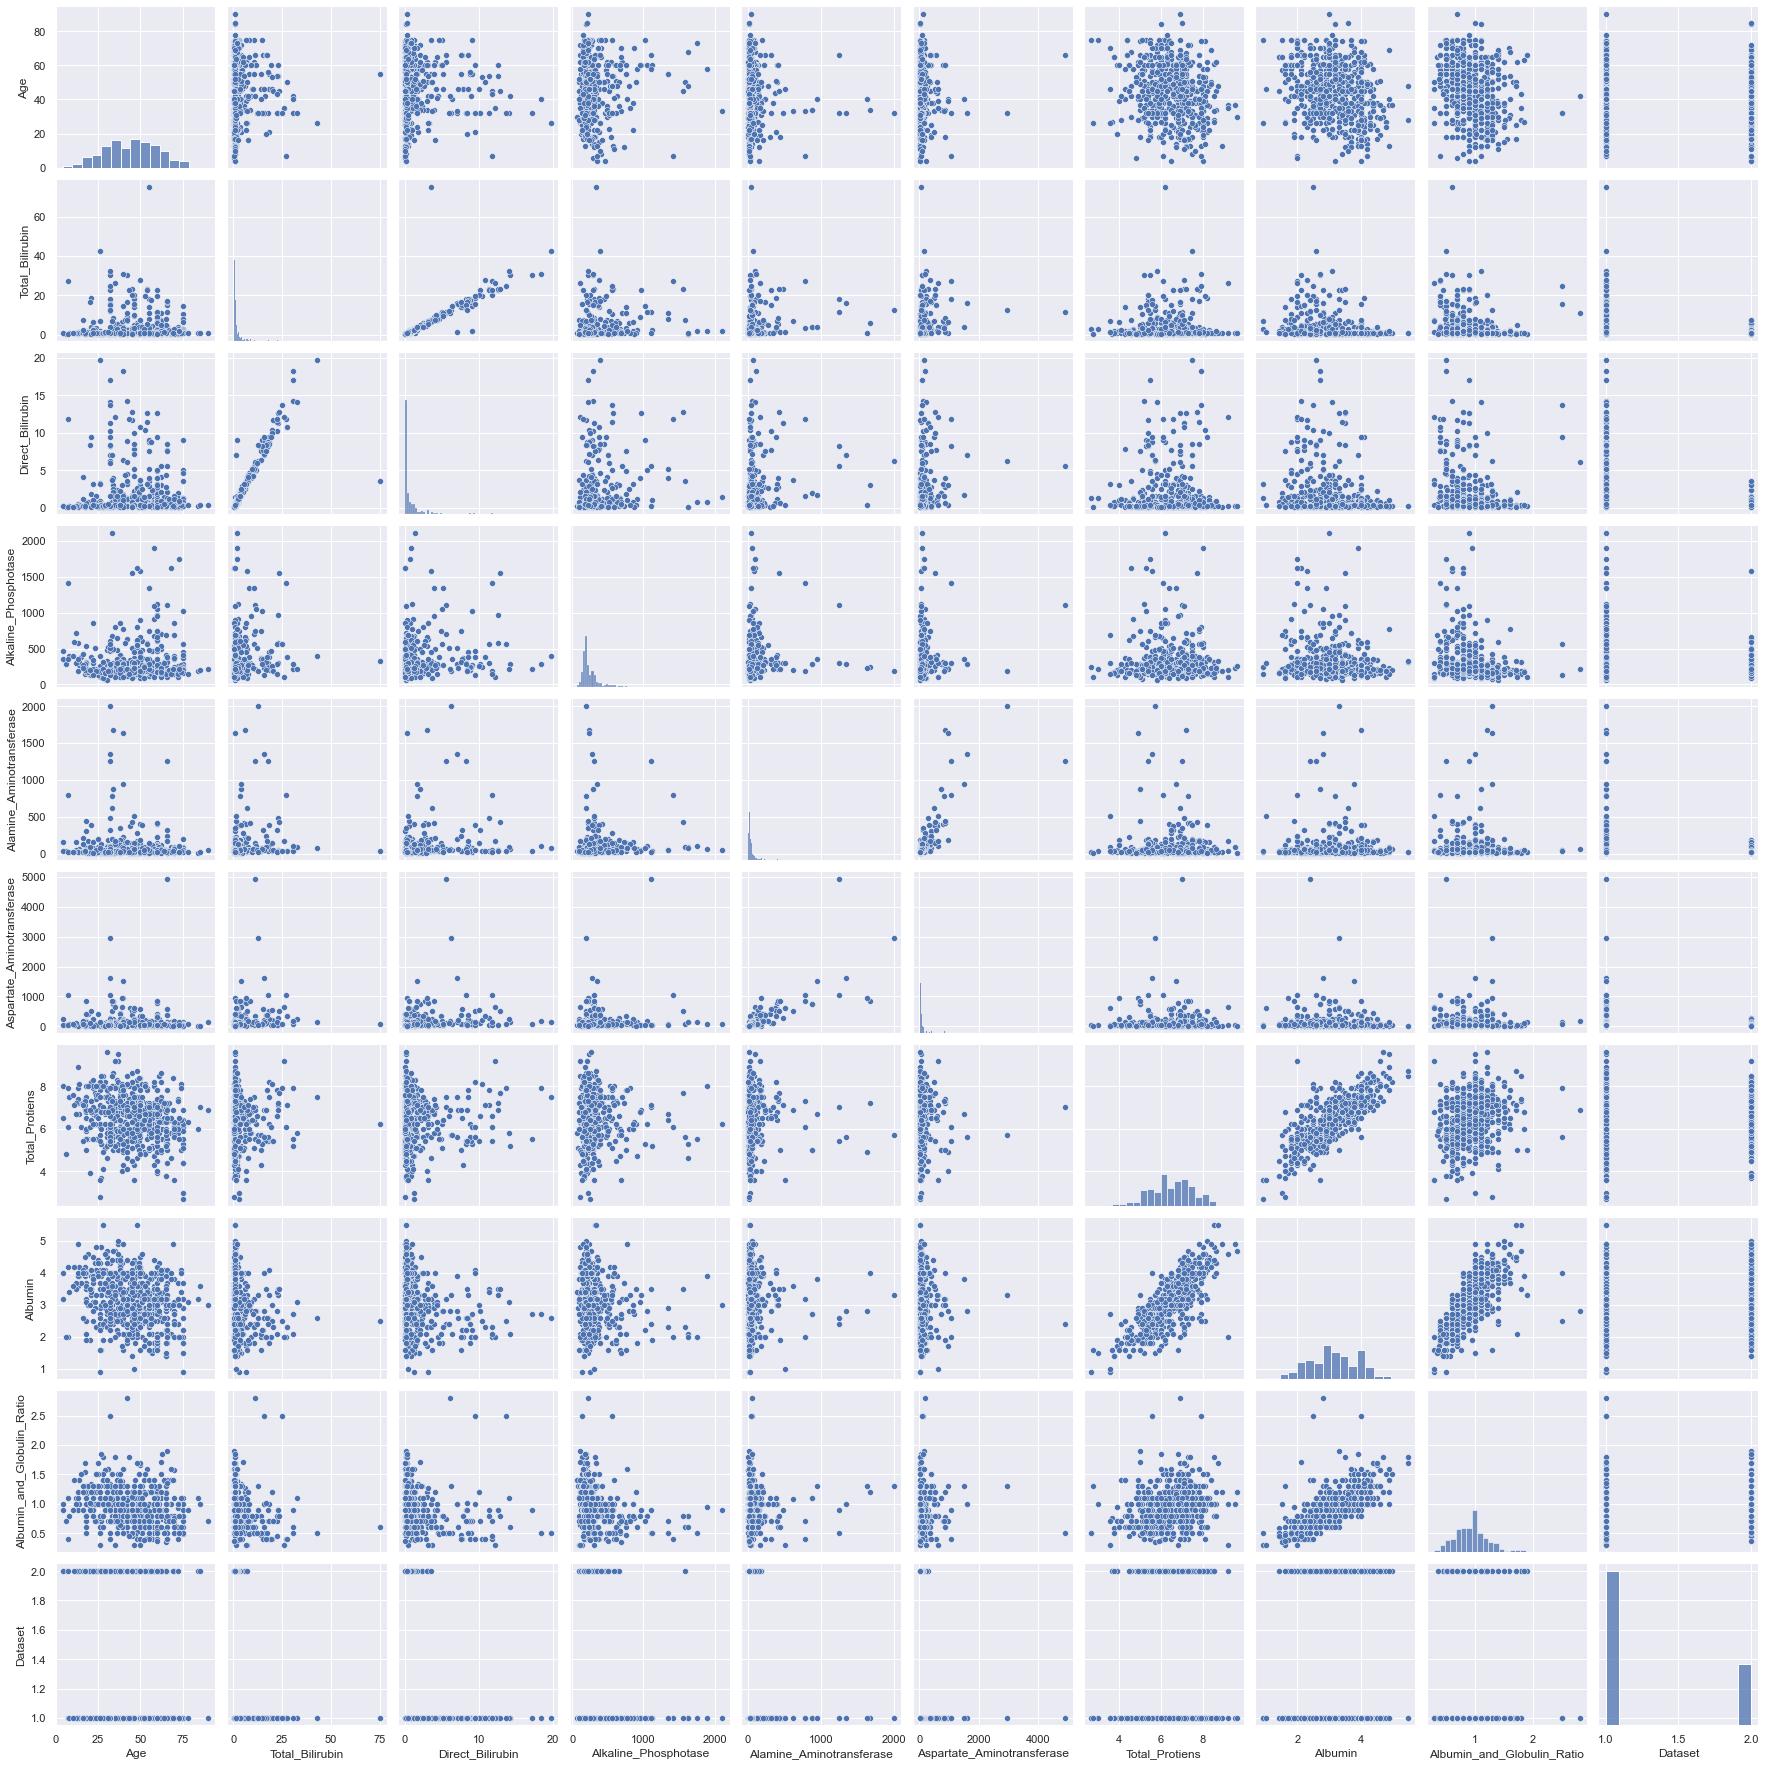

In [12]:
sns.pairplot(dataset)

<AxesSubplot:>

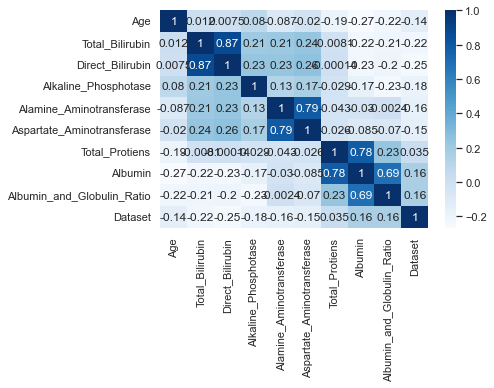

In [13]:
cor=dataset.corr()

sns.heatmap(cor,annot=True,cbar=True,cmap='Blues')

In [14]:
# total bilirubin Range are 1.2 milligrams per deciliter (mg/dL)
# Normal range of direct bilirubin for adults is 0.3
# Alkaline_Phosphotase normal range of total Protein is 6 - 8.3  (g/dL) for adults
# Alamine_Aminotransferase normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L)
# The normal range for adults is 4 to 36 U/L
# Aspartate_Aminotransferase normal range is 8 to 33 U/L
# Total protein normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L
# Albumin normal range is 3.4 to 5.4 g/dL (34 to 54 g/L
# Albumin_and_Globulin_Ratio and normal serum protein level is 6 to 8 g/dl. Albumin makes up 3.5 to 5.0 g/dl,

In [15]:
# Sorted data according to Age
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].sort_values('Age', ascending=False)[0:5]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.7
44,85,Female,1.0,0.3,208,17,15,7.0,3.6,1.0
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.1
397,78,Male,1.0,0.3,152,28,70,6.3,3.1,0.9
178,75,Male,10.6,5.0,562,37,29,5.1,1.8,0.5


In [16]:
# Sorted data according to Gender
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Gender', ascending=False)[0:5]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Albumin_and_Globulin_Ratio,Dataset
291,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.1,1.1,2
379,72,Male,0.7,0.2,185,16,22,7.3,3.7,1.0,1.0,2
375,47,Male,3.5,1.6,206,32,31,6.8,3.4,1.0,1.0,1
372,48,Male,0.7,0.2,326,29,17,8.7,5.5,1.7,1.7,1
371,33,Male,0.8,0.2,135,30,29,7.2,4.4,1.5,1.5,2


In [17]:
# Sorted data according to Age
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Dataset', ascending=False)[0:5]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Albumin_and_Globulin_Ratio,Dataset
291,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.10,1.10,2
131,70,Female,0.7,0.2,237,18,28,5.8,2.5,0.75,0.75,2
281,50,Male,0.7,0.2,192,18,15,7.4,4.2,1.30,1.30,2
283,18,Male,1.3,0.7,316,10,21,6.0,2.1,0.50,0.50,2
287,43,Male,1.3,0.6,155,15,20,8.0,4.0,1.00,1.00,2


In [18]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [19]:
cor=dataset.corr()

<AxesSubplot:>

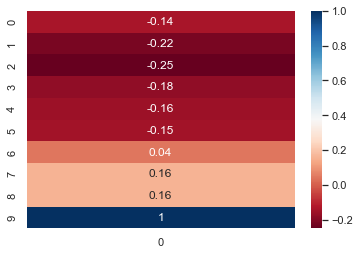

In [47]:
sns.heatmap(data=cor.iloc[-1,:].values.reshape(-1, 1).round(2), annot=True, cmap='RdBu')

<AxesSubplot:>

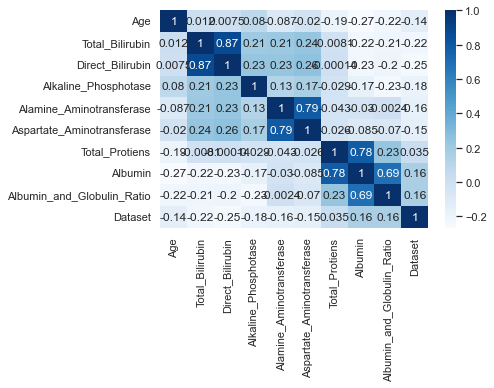

In [48]:
sns.heatmap(data=cor,cbar=True,annot=True,cmap="Blues")

<AxesSubplot:ylabel='Dataset'>

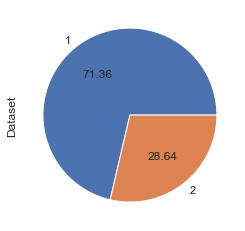

In [21]:
dataset['Dataset'].value_counts().plot.pie(autopct='%.2f')

In [22]:
# another way to label encoder
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [23]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
# filling the null value 
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [25]:
dataset.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [26]:
x=dataset.drop(['Dataset'], axis=1)
y=dataset['Dataset']

In [27]:
y.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [28]:
# Here this dataset is also imbalance in dependent variables.
from imblearn.over_sampling import RandomOverSampler

In [29]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)

In [30]:
y_ros.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.15,random_state=101)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

[13:24:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************************************************************************
                   Method Used  Test Accuracy
0          Logistic Regression          0.672
1     Decision Tree Classifier          0.800
2       RandomForestClassifier          0.856
3       Support Vector machine          0.656
4    

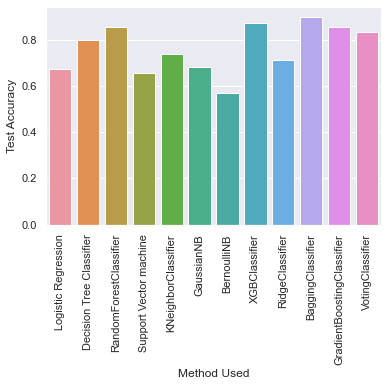

In [33]:
#Model Building 
#**************Logistic Regression************
List=[]
accuracy=[]

lr=LogisticRegression()
logr=lr.fit(x_train,y_train)
pred_lr_test=logr.predict(x_test)
pred_lr_train=logr.predict(x_train)

accuracy_lr_test=accuracy_score(y_test,pred_lr_test)
accuracy_lr_train=accuracy_score(y_train,pred_lr_train)

lr_f1=f1_score(pred_lr_test,y_test)

#************** Decision Tree Classifier **************

dstr=DecisionTreeClassifier()
dcsntre=dstr.fit(x_train,y_train)
pred_dstr_test=dcsntre.predict(x_test)
pred_dstr_train=dcsntre.predict(x_train)

accuracy_dcsntre_test=accuracy_score(y_test,pred_dstr_test)
accuracy_dcsntre_train=accuracy_score(y_train,pred_dstr_train)

dscntre_f1=f1_score(y_test,pred_dstr_test)


#************* RandomForestClassifier **************

rndmfrst=RandomForestClassifier()
rndm=rndmfrst.fit(x_train,y_train)
pred_rndm_test=rndm.predict(x_test)
pred_rndm_train=rndm.predict(x_train)

accuracy_rndmfrst_test= accuracy_score(y_test,pred_rndm_test)
accuracy_rndmfrst_train= accuracy_score(y_train,pred_rndm_train)

rndmfrst_f1=f1_score(y_test,pred_rndm_test)

#*************** Support Vector machine (default kernal= rbf) ************

sprtvcmchn=SVC()
sptvcmn=sprtvcmchn.fit(x_train,y_train)
pred_sprtvcmn_test=sptvcmn.predict(x_test)
pred_sprtvcmn_train=sptvcmn.predict(x_train)

accuracy_sprtvcmn_test=accuracy_score(y_test,pred_sprtvcmn_test)
accuracy_sprtvcmn_train=accuracy_score(y_train,pred_sprtvcmn_train)

svc_f1=f1_score(y_test,pred_sprtvcmn_test)

#****************** KNeighborClassifier ******************

knnclfr=KNeighborsClassifier()
knn=knnclfr.fit(x_train,y_train)
pred_knn_test=knn.predict(x_test)
pred_knn_train=knn.predict(x_train)

accuracy_knn_test=accuracy_score(y_test,pred_knn_test)
accuracy_knn_train=accuracy_score(y_train,pred_knn_train)

knn_f1=f1_score(y_test,pred_knn_test)

#*************** GaussianNB *********************

gnbcls=GaussianNB()
gnb=gnbcls.fit(x_train,y_train)

pred_gnb_test=gnb.predict(x_test)
pred_gnb_train=gnb.predict(x_train)

accuracy_gnb_test=accuracy_score(y_test,pred_gnb_test)
accuracy_gnb_train=accuracy_score(y_train,pred_gnb_train)

gnb_f1=f1_score(y_test,pred_gnb_test)

#***************** BernoulliNB*******************

bnbcls=BernoulliNB()
bnb=bnbcls.fit(x_train,y_train)
pred_bnb_test=bnb.predict(x_test)
pred_bnb_train=bnb.predict(x_train)

accuracy_bnb_test=accuracy_score(y_test,pred_bnb_test)
accuracy_bnb_train=accuracy_score(y_train,pred_bnb_train)

bnb_f1=f1_score(y_test,pred_bnb_test)

#****************XGBClassifier *********************

xgbcls=XGBClassifier()
xgb=xgbcls.fit(x_train,y_train)
pred_xgb_test=xgb.predict(x_test)
pred_xgb_train=xgb.predict(x_train)

accuracy_xgb_test=accuracy_score(y_test,pred_xgb_test)
accuracy_xgb_train=accuracy_score(y_train,pred_xgb_train)

xgb_f1=f1_score(y_test,pred_xgb_test)

#**************** Ridge Classifier ********************

ridg=RidgeClassifier()
rgmodel=ridg.fit(x_train,y_train)
pred_rg_test=rgmodel.predict(x_test)
pred_rg_train=rgmodel.predict(x_train)

accuracy_rg_test=accuracy_score(y_test,pred_rg_test)
accuracy_rg_train=accuracy_score(y_train,pred_rg_train)

rg_f1=f1_score(y_test,pred_rg_test)

#***********************Bagging Classifier *******************

Bagg=BaggingClassifier()
bag=Bagg.fit(x_train,y_train)

pred_bg_test=bag.predict(x_test)
pred_bg_train=bag.predict(x_train)

accuracy_bg_test=accuracy_score(y_test,pred_bg_test)
accuracy_bg_train=accuracy_score(y_train,pred_bg_train)

bg_f1=f1_score(y_test,pred_bg_test)

#******************* Gradient Boosting Classifier **********************

graboo=GradientBoostingClassifier()
gb=graboo.fit(x_train,y_train)

pred_gb_test=gb.predict(x_test)
pred_gb_train=gb.predict(x_train)

accuracy_gb_test=accuracy_score(y_test,pred_gb_test)
accuracy_gb_train=accuracy_score(y_train,pred_gb_train)

gb_f1=f1_score(y_test,pred_gb_test)

#*************VotingClassifier**********************

from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('LR',logr),('DT',dcsntre),('Rndomfrst',rndm),('sprtvcmchn',sptvcmn),('KNNcls',knn),
                                 ('GNBCLS',gnb),('BNBCLS',bnb),('XGBCLS',xgb),('Ridg',rgmodel),('Baggg',bag),('Grabo',gb)],voting='hard',flatten_transform=True)
model_evc=evc.fit(x_train,y_train)
pred_evc_test=model_evc.predict(x_test)
pred_evc_train=model_evc.predict(x_train)

accuracy_evc_test=accuracy_score(y_test,pred_evc_test)
accuracy_evc_train=accuracy_score(y_train,pred_evc_train)

evc_f1=f1_score(y_test,pred_evc_test)


list1=['Logistic Regression','Decision Tree Classifier','RandomForestClassifier','Support Vector machine','KNeighborClassifier',
       'GaussianNB','BernoulliNB','XGBClassifier','RidgeClassifier','BaggingClassifier','GradientBoostingClassifier',
       'VotingClassifier']

listtest=[accuracy_lr_test,accuracy_dcsntre_test,accuracy_rndmfrst_test,accuracy_sprtvcmn_test,accuracy_knn_test,
         accuracy_gnb_test,accuracy_bnb_test,accuracy_xgb_test,accuracy_rg_test,accuracy_bg_test,accuracy_gb_test,accuracy_evc_test]
listtrain=[accuracy_lr_train,accuracy_dcsntre_train,accuracy_rndmfrst_train,accuracy_sprtvcmn_train,accuracy_knn_train,
          accuracy_gnb_train,accuracy_bnb_train,accuracy_xgb_train,accuracy_rg_train,accuracy_bg_train,accuracy_gb_train,accuracy_evc_train]

listinstance=[logr,dcsntre,rndm,sptvcmn,knn,gnb,bnb,xgb,rgmodel,bag,gb,model_evc]

listf1=[lr_f1,dscntre_f1,rndmfrst_f1,svc_f1,knn_f1,gnb_f1,bnb_f1,xgb_f1,rg_f1,bg_f1,gb_f1,evc_f1]


df_testaccuracy = pd.DataFrame({'Method Used' :list1, "Test Accuracy" :listtest})
print('***********'*10)
print(df_testaccuracy)

charts = sns.barplot(x='Method Used', y = 'Test Accuracy', data=df_testaccuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

**************************************************************************************************************
                   Method Used  Train Accuracy
0          Logistic Regression        0.705799
1     Decision Tree Classifier        1.000000
2       RandomForestClassifier        1.000000
3       Support Vector machine        0.674682
4          KNeighborClassifier        0.801980
5                   GaussianNB        0.677511
6                  BernoulliNB        0.516266
7                XGBClassifier        1.000000
8              RidgeClassifier        0.715700
9            BaggingClassifier        0.995757
10  GradientBoostingClassifier        0.919378
11            VotingClassifier        0.926450
AxesSubplot(0.125,0.125;0.775x0.755)


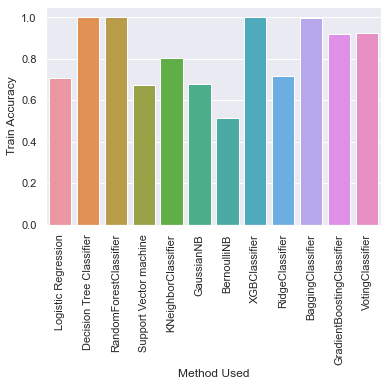

In [34]:
df_trainaccuracy = pd.DataFrame({'Method Used' :list1, "Train Accuracy" :listtrain})
print('***********'*10)
print(df_trainaccuracy)

charts1 = sns.barplot(x='Method Used', y = 'Train Accuracy', data=df_trainaccuracy)
charts1.set_xticklabels(charts1.get_xticklabels(), rotation=90)
print(charts1)

**************************************************************************************************************
                   Method Used  F1_Score
0          Logistic Regression  0.649573
1     Decision Tree Classifier  0.793388
2       RandomForestClassifier  0.850000
3       Support Vector machine  0.598131
4          KNeighborClassifier  0.722689
5                   GaussianNB  0.583333
6                  BernoulliNB  0.653846
7                XGBClassifier  0.864407
8              RidgeClassifier  0.660377
9            BaggingClassifier  0.897638
10  GradientBoostingClassifier  0.844828
11            VotingClassifier  0.814159
AxesSubplot(0.125,0.125;0.775x0.755)


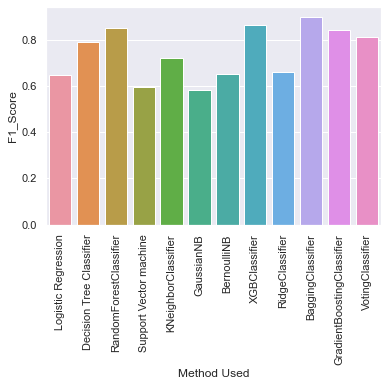

In [35]:
df_f1score = pd.DataFrame({'Method Used' :list1, "F1_Score" :listf1})
print('***********'*10)
print(df_f1score)

charts2 = sns.barplot(x='Method Used', y = 'F1_Score', data=df_f1score)
charts2.set_xticklabels(charts2.get_xticklabels(), rotation=90)
print(charts2)

# Now Run These trained data with Hyperparameter tuning models

<!--  Now Run with Tuned Hyperparameter -->

In [37]:
# grid searching key hyperparametres for *******************logistic regression********************************
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
lr_bestscore=grid_result.best_score_
print(lr_bestscore)
lr_Bestparam=grid_result.best_params_
print(lr_Bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

0.7086317907444667
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [38]:
#************************************************ Decision Tree ***********************************

params={
    'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100],'criterion':['gini','entropy']}

grid_search=GridSearchCV(estimator=dstr, param_grid=params,cv=4,n_jobs= -1,verbose=1,scoring="accuracy")
grid_search.fit(x_train,y_train)

dstr_best=grid_search.best_score_
print(dstr_best)
dstr_bestparam=grid_search.best_estimator_
print(dstr_bestparam)

# def evaluate_model(dt_classifier):
#     print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
#     print("Train Confusion Matrix:")
#     print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
#     print("-"*50)
#     print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
#     print("Test Confusion Matrix:")
#     print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
0.7283882254750899
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)


In [39]:
#****************Random Forest *******************************
# define models and parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rndmfrst, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
rndmfrsst_best=grid_result.best_score_
print(rndmfrsst_best)
rndmfrst_bestparam=grid_result.best_params_
print(rndmfrst_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

0.8434942991281018
{'max_features': 'log2', 'n_estimators': 10}


In [40]:
#****************************svc*****************************
# define parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=sprtvcmchn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
svc_best=grid_result.best_score_
print(svc_best)
svc_bestparam=grid_result.best_params_
print(svc_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
  

0.6869215291750503
{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [41]:
#*********************************knn*************************************************
# define models and parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knnclfr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
knn_best=grid_result.best_score_
print(knn_best)
knn_bestParams=grid_result.best_params_
print(knn_bestParams)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
 

0.8067337357478201
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [42]:
# ******************************** Ridge Classifier ***********************************
# define parameters
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
ridg_best=grid_result.best_score_
print(ridg_best)
ridg_bestparam=grid_result.best_params_
print(ridg_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))




0.7020456069751845
{'alpha': 0.1}


In [43]:
# ********************************** Bagging Classifier *********************************
# define parameters
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Bagg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
bag_best=grid_result.best_score_
print(bag_best)
bag_bestParam= grid_result.best_params_
print(bag_bestParam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


0.839268947015426
{'n_estimators': 10}


In [44]:
#************************ Gradient Boosting Classifier *********************************************
# define parameters
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=graboo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

# summarize results
graboo_best= grid_result.best_score_
print(graboo_best)
graboo_bestparam= grid_result.best_params_
print(graboo_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


0.8571428571428571
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}


In [45]:
# **************************** Gaussian NB *************************************************
# define grid search
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnbcls, param_grid=params_NB, cv=cv_method,verbose=1, scoring='accuracy')
gs_NB.fit(x_train,y_train);

gs_NB_best=gs_NB.best_score_
print(gs_NB_best)
gs_NB_bestparam=gs_NB.best_params_
print(gs_NB_bestparam)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
0.67840708553924
{'var_smoothing': 3.5111917342151277e-08}


**************************************************************************************************************
                    Classifiers  Best Score
0           Logistic Regression    0.708632
1      Decision Tree Classifier    0.728388
2      Random Forest Classifier    0.843494
3        Support Vector Machine    0.686922
4         KNeighbors Classifier    0.806734
5              Ridge Classifier    0.702046
6            Bagging Classifier    0.839269
7  Gradient Boosting Classifier    0.857143
8          Gaussian Naive Bayes    0.678407
AxesSubplot(0.125,0.125;0.775x0.755)


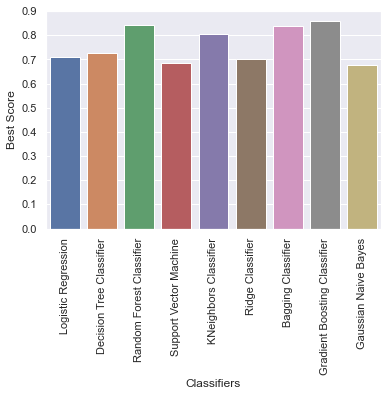

In [46]:
hpcls=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Machine','KNeighbors Classifier','Ridge Classifier','Bagging Classifier','Gradient Boosting Classifier','Gaussian Naive Bayes']
bstscr=[lr_bestscore,dstr_best,rndmfrsst_best,svc_best,knn_best,ridg_best,bag_best,graboo_best,gs_NB_best]

df_HpClsBestscore = pd.DataFrame({'Classifiers' :hpcls, "Best Score" :bstscr})
print('***********'*10)
print(df_HpClsBestscore)

chartt = sns.barplot(x='Classifiers', y = 'Best Score', data=df_HpClsBestscore)
chartt.set_xticklabels(chartt.get_xticklabels(), rotation=90)
print(chartt)